In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os

# import igraph
# import scvelo as scv

In [2]:
X = io.mmread("../data/to_py/matrix.mtx")

In [4]:
adata = anndata.AnnData(X=X.transpose().tocsr())

In [5]:
adata

AnnData object with n_obs × n_vars = 3855 × 9751

In [6]:
metadata = pd.read_csv("../data/to_py/metadata.csv")

In [8]:
with open("../data/to_py/gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [9]:
adata.obs = metadata
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

In [10]:
adata

AnnData object with n_obs × n_vars = 3855 × 9751
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mtUMI', 'mitoRatio', 'cells', 'sample', 'integrated_snn_res.0.4', 'integrated_snn_res.0.5', 'integrated_snn_res.0.6', 'integrated_snn_res.0.8', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.1', 'barcode', 'UMAP_1', 'UMAP_2'

In [11]:
pca= pd.read_csv("../data/to_py/pca.csv")
pca.index = adata.obs.index

In [12]:
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

In [13]:
adata

AnnData object with n_obs × n_vars = 3855 × 9751
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mtUMI', 'mitoRatio', 'cells', 'sample', 'integrated_snn_res.0.4', 'integrated_snn_res.0.5', 'integrated_snn_res.0.6', 'integrated_snn_res.0.8', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.1', 'barcode', 'UMAP_1', 'UMAP_2'
    obsm: 'X_pca', 'X_umap'

In [25]:
types = pd.read_csv("../data/to_py/types.csv")
types.index = adata.obs.index

In [34]:
adata.obs['cell_type'] = types

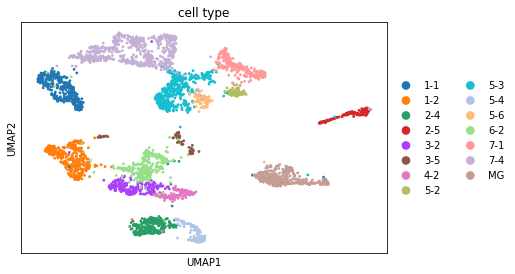

In [38]:
sc.pl.scatter(adata, basis='umap', color=['cell_type'])

In [42]:
import umap

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/danabarilan/opt/miniconda3/envs/devo-

In [96]:
auc_mtx = pd.read_csv("~/Documents/forMasters/Intenship/code/devo-grn/results/run_02/" + "AUCell_mat.csv", index_col=0)

In [97]:
reg_top80 = pd.read_csv("~/Documents/forMasters/Intenship/code/devo-grn/results/run_02/" + "regulons_top80.csv", index_col=0)
    # keep AUC_mtx TFs that are in reg_top80:
auc_mtx_top80 = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]

In [98]:
runUmap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform
dr_umap = runUmap( auc_mtx )

In [99]:
pd.DataFrame(dr_umap, columns=['X','Y'], index=auc_mtx.index).to_csv( "scenic_umap", sep='\t' )

In [105]:
# same for top 80
runUmap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform
dr_umap_top80 = runUmap( auc_mtx_top80 )
pd.DataFrame(dr_umap_top80, columns=['X_aucell_top','Y_aucell_top'], index=auc_mtx_top80.index).to_csv( "scenic_umap_top80", sep='\t' )

Cluster by AUCell score


In [106]:
adata_aucell = adata.copy()

In [107]:
umap_top80 = pd.read_csv("scenic_umap_top80", sep='\t', index_col=[0])
umap_top80

,X_aucell_top,Y_aucell_top
Cell,,
TP1_AAACCTGAGTAACCCT,10.502047,-0.109786
TP1_AAACCTGGTACCATCA,7.681560,16.889210
TP1_AAACCTGGTTACGTCA,0.711088,11.228579
TP1_AAACCTGTCAACACTG,5.221521,8.998893
TP1_AAACCTGTCATGCTCC,7.769533,4.767974
...,...,...
TP2.2_TTTGTCAAGGTGTGGT,8.621963,16.510921
TP2.2_TTTGTCACATGTCGAT,8.355813,9.454118
TP2.2_TTTGTCAGTGATAAAC,9.404920,5.898484


In [108]:
adata_aucell.obs = adata_aucell.obs.merge(how='left', right=umap_top80, left_index=True, right_index=True)

In [109]:
adata_aucell.obsm['X_umap'] = np.vstack((adata_aucell.obs['X_aucell_top'].to_numpy(), adata_aucell.obs['Y_aucell_top'].to_numpy())).T

In [110]:
adata_aucell

AnnData object with n_obs × n_vars = 3855 × 9751
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mtUMI', 'mitoRatio', 'cells', 'sample', 'integrated_snn_res.0.4', 'integrated_snn_res.0.5', 'integrated_snn_res.0.6', 'integrated_snn_res.0.8', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.1', 'barcode', 'UMAP_1', 'UMAP_2', 'cell_type', 'X_aucell_top', 'Y_aucell_top'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

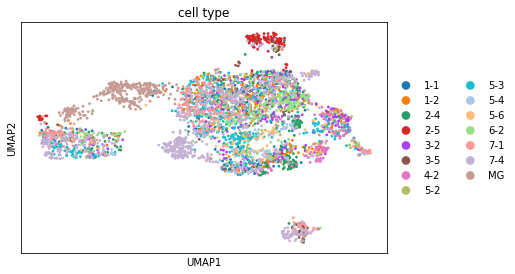

In [111]:
sc.pl.scatter(adata_aucell, basis='umap',color=['cell_type', ])